<a href="https://colab.research.google.com/github/micida33/python_codes/blob/main/video2image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

In [1]:
# import
import os
import shutil
import numpy as np
import cv2
cv2.__version__

'4.1.2'

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

# check if mounted
!ls gdrive

Mounted at /content/gdrive
MyDrive  Shareddrives


# ビデオファイルの基本操作

In [22]:
# ビデオの読み込み、サイズとフレームを表示

# ビデオフォルダのパスと、ファイル名を入力
videofile_folder = '/content/gdrive/MyDrive/ML/videoDB/'
videofile_name = '20200909LDP_D2(ishida).mp4'

# ビデオファイルへのパスを格納
path_videofile = videofile_folder + videofile_name # パス確認用： print(path_video)

# ビデオ画像のサイズとfpsを表示

cap = cv2.VideoCapture(path_videofile) 
fps    = cap.get(cv2.CAP_PROP_FPS) 
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 
width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH) 
count  = cap.get(cv2.CAP_PROP_FRAME_COUNT)

print("width:{}, height:{}, count:{}, fps:{}".format(width,height,count,fps))

cap.release() 


width:1920.0, height:1080.0, count:2343660.0, fps:60.0


In [29]:
# 動画から画像切り出しの基本コード

# 画像ディレクトリの設定
image_dir = '/content/gdrive/MyDrive/ML/videoDB/test_images/'


video_file = path_videofile
image_file = '%s.png'

cap = cv2.VideoCapture(video_file)

start_frame = 360000 #フレーム/60で開始からの秒
end_frame = 360600 #フレーム/60で開始からの秒

cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
flag, frame = cap.read()  # Capture frame-by-frame

for frame_num in range(start_frame, end_frame, 60):
  cv2.imwrite(image_dir+image_file % str(frame_num).zfill(6), frame)

cap.release()  # When everything done, release the capture

In [37]:
# time2frame
input_start = '014000'
input_end = '014010'
start_frame = int(input_start[0:2])*216000 + int(input_start[2:4])*3600 + int(input_start[4:])*60
end_frame = int(input_end[0:2])*216000 + int(input_end[2:4])*3600 + int(input_end[4:])*60

print(start_frame, end_frame)

360000 360600


# ビデオファイルから画像ファイルへの切り出し

In [43]:
# 切り出しまとめ

# 元のビデオフォルダのパスと、ファイル名を入力
videofile_folder = '/content/gdrive/MyDrive/video/LC/' # ビデオのあるフォルダー
videofile_name = '20201118LC(mitachi).mp4' # ビデオファイル名
# ワーキングディレクトリの設定
working_dir = '/content/gdrive/MyDrive/ML/videoDB/test_images/' # 画像フォルダを保存するフォルダ選択

# 切り出し時間の設定：時間をフレームへ変換
input_start = '014000' # 開始時間 
input_end = '014010' # 終了時間
second_interval = 1 # 何秒ごとか
start_frame = int(input_start[0:2])*216000 + int(input_start[2:4])*3600 + int(input_start[4:])*60
end_frame = int(input_end[0:2])*216000 + int(input_end[2:4])*3600 + int(input_end[4:])*60

# 確認用：print(start_frame, end_frame)


# パス・ディレクトリの設定
working_subdir = videofile_name[:-4] + "/"
image_dir = working_dir + working_subdir

# フォルダが無いときは新規作成
if not os.path.exists(image_dir):
  os.makedirs(image_dir)
# ファイルがダブるときは、新しいものが上書き

# ビデオファイルへのパスを格納
path_videofile = videofile_folder + videofile_name # パス確認用： print(path_video, image_dir)

video_file = path_videofile
image_file = '%s.png'

cap = cv2.VideoCapture(video_file)
fps = cap.get(cv2.CAP_PROP_FPS) 
frame_interval = second_interval * int(fps)

cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
flag, frame = cap.read()  # Capture frame-by-frame

for frame_num in range(start_frame, end_frame, frame_interval):
  cv2.imwrite(image_dir+image_file % str(frame_num).zfill(6), frame)

cap.release()  # When everything done, release the capture


In [18]:
# 全長を切り出し保存

# 元のビデオフォルダのパスと、ファイル名を入力
videofile_folder = '/content/gdrive/MyDrive/video/LC/' # ビデオのあるフォルダー
videofile_name = '20201118LC(mitachi).mp4' # ビデオファイル名
# ワーキングディレクトリの設定
working_dir = '/content/gdrive/MyDrive/ML/videoDB/test_images/' # 画像フォルダを保存するフォルダ選択
'''
# 切り出し時間の設定：時間をフレームへ変換
input_start = '014000' # 開始時間 
input_end = '014010' # 終了時間

start_frame = int(input_start[0:2])*216000 + int(input_start[2:4])*3600 + int(input_start[4:])*60
end_frame = int(input_end[0:2])*216000 + int(input_end[2:4])*3600 + int(input_end[4:])*60

# 確認用：print(start_frame, end_frame)
'''
second_interval = 1 # 何秒ごとか

# パス・ディレクトリの設定
working_subdir = videofile_name[:-4] + "/"
image_dir = working_dir + working_subdir

# フォルダが無いときは新規作成
if not os.path.exists(image_dir):
  os.makedirs(image_dir)
# ファイルがダブるときは、新しいものが上書き

# ビデオファイルへのパスを格納
path_videofile = videofile_folder + videofile_name # パス確認用： print(path_video, image_dir)

video_file = path_videofile
image_file = '%s.png'

cap = cv2.VideoCapture(video_file)
fps = cap.get(cv2.CAP_PROP_FPS) 
frame_interval = second_interval * int(fps)
all_frame = cap.get(cv2.CAP_PROP_FRAME_COUNT)
'''
i = 0
while(cap.isOpened()):
    flag, frame = cap.read()  # Capture frame-by-frame
    if flag == False:  # Is a frame left?
        break
    cv2.imwrite(image_dir+image_file % str(i).zfill(6), frame)  # Save a frame
    print('Save', image_dir+image_file % str(i).zfill(6))
    i += 1

cap.release()  # When everything done, release the capture
'''
'''
i=0
count = 0
cpf = second_interval * fps # 何秒ごとに画像を作るかー＞フレームへ    

while(cap.isOpened()):
    ret, frame = cap.read()                   #動画を読み込む
    #assert frame, "オープンに失敗"            #デバッグ用

    if ret == False:
        print('Finished')                    #動画の切り出しが終了した時
        break

    if count%cpf == 0:                      #何フレームに１回切り出すか

        #第１引数画像のファイル名、第２引数保存したい画像
        write = cv2.imwrite(image_dir+image_file % str(frame_num).zfill(10))  # 切り出した画像を表示する
        assert write, "保存に失敗"
        print('Save', image_dir+image_file % str(frame_num).zfill(10))          #確認用表示
        i += 1

    count = count + 1

cap.release()
'''
for frame_num in range(0, int(all_frame), frame_interval):
  cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
  flag, frame = cap.read()  # Capture frame-by-frame
  if flag:
    cv2.imwrite(image_dir+image_file % str(frame_num).zfill(10), frame)
  else:
    break

cap.release()  # When everything done, release the capture

/content/gdrive/MyDrive/ML/videoDB/test_images/20201118LC(mitachi)/0000218220.png


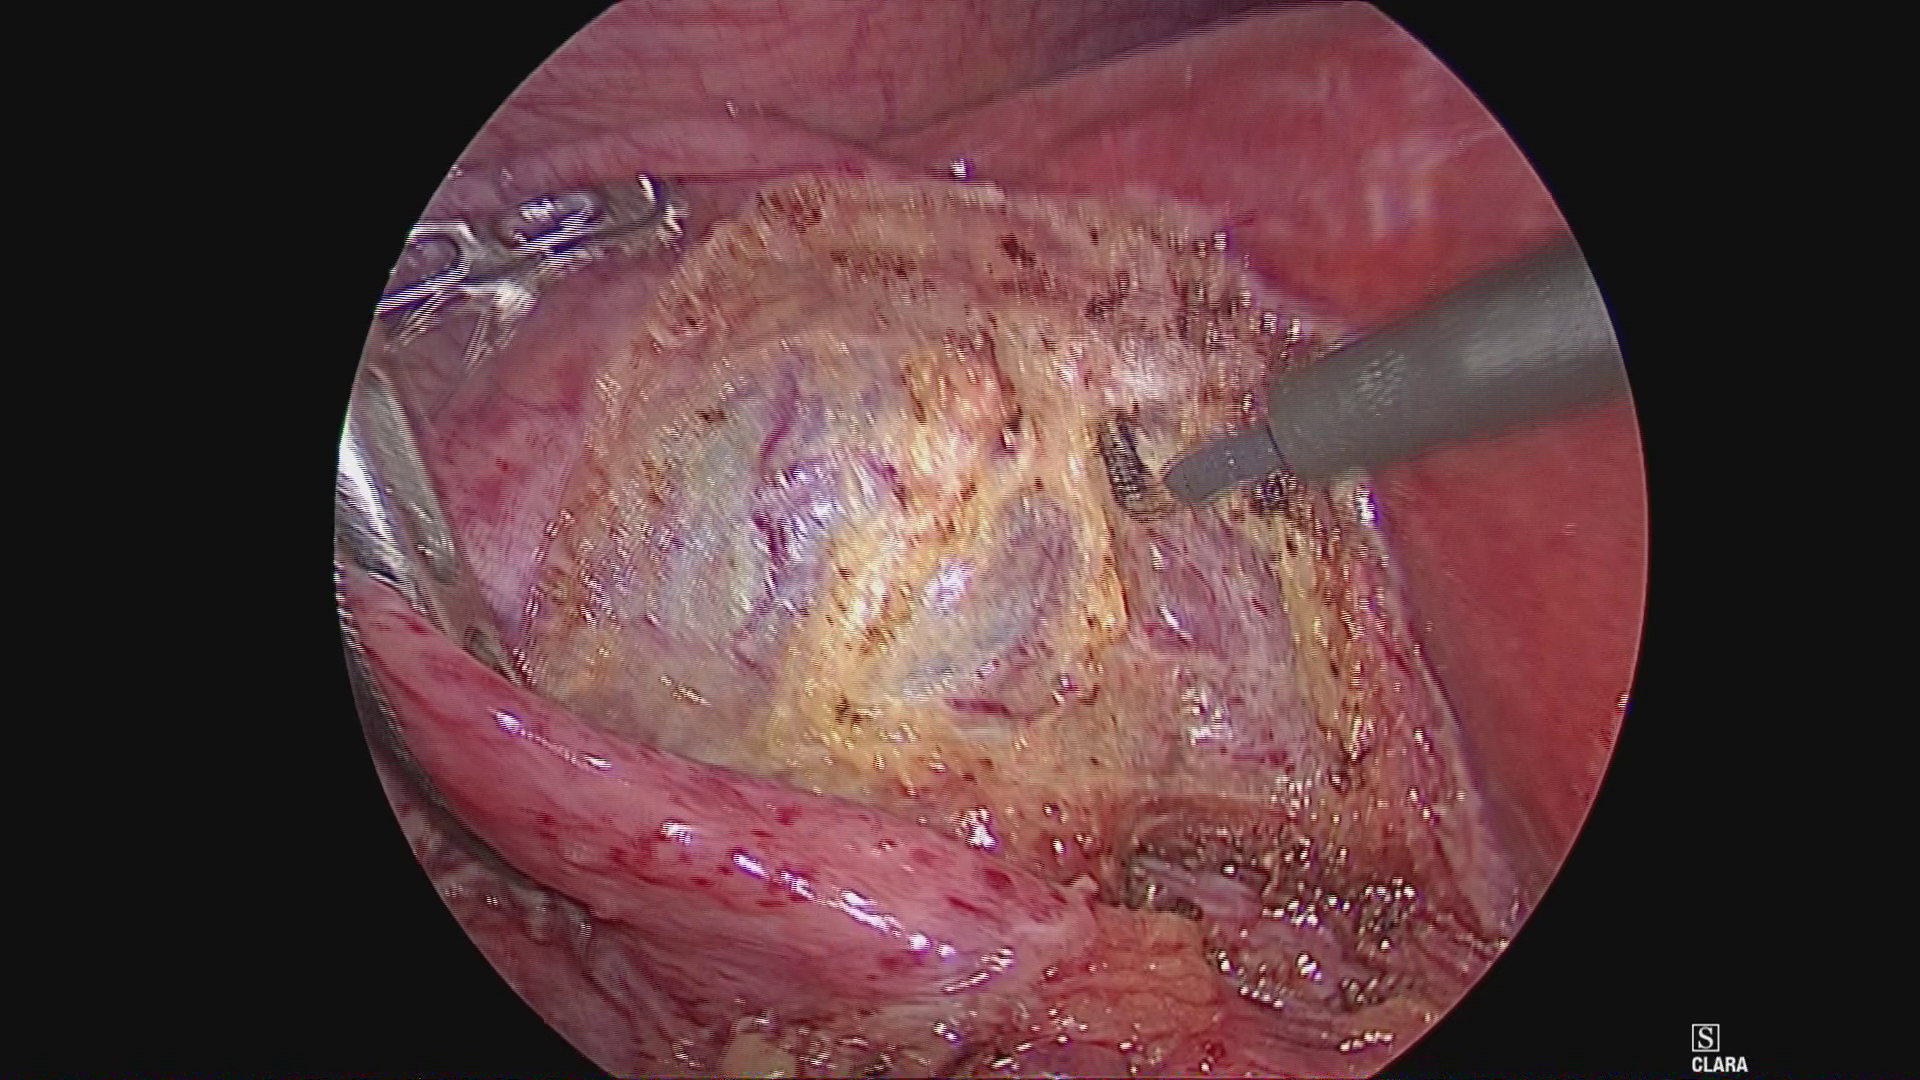

In [19]:
# サンプリングによる確認用(画像切り出しの直後に使用)
#サポートパッチのインポート
from google.colab.patches import cv2_imshow
middle_frame = int(count/2)
middle_file_path = image_dir + str(middle_frame).zfill(10) + ".png"

middle_image = cv2.imread(middle_file_path, cv2.IMREAD_UNCHANGED)
print(middle_file_path)
cv2_imshow(middle_image)

# 以前のもの

In [ ]:
# ビデオを画像に変換

def video_2_frames(video_file='/content/Ecoronal.mp4', image_dir='/content/image_dir/', image_file='img_%s.png'):
    # Delete the entire directory tree if it exists.
    if os.path.exists(image_dir):
        shutil.rmtree(image_dir)  

    # Make the directory if it doesn't exist.
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)

    # Video to frames
    i = 0
    cap = cv2.VideoCapture(video_file)
    while(cap.isOpened()):
        flag, frame = cap.read()  # Capture frame-by-frame
        if flag == False:  # Is a frame left?
            break
        cv2.imwrite(image_dir+image_file % str(i).zfill(6), frame)  # Save a frame
        print('Save', image_dir+image_file % str(i).zfill(6))
        i += 1

    cap.release()  # When everything done, release the capture

In [ ]:
# 動画サイズのトリミング（ビデオファイルのパスは指定済み）

# 縦横のトリミング：x0は縦の上側～x1は縦の下側、y0は横の左側～y1は横の右側
x0 = 200
x1 = 1300
y0 = 500
y1 = 2000
# 
# 
cap = cv2.VideoCapture(path_video) 
fps    = cap.get(cv2.CAP_PROP_FPS) 
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 
width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH) 

# 書き出し先　形式はMP4Vを指定 
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v') 
# out = cv2.VideoWriter("/content/gdrive/My Drive/education/SGT/after_COVID/cases/PKK/images/video_out.m4v",int(fourcc), fps, (int(y1 - y0), int(x1 - x0)))
out = cv2.VideoWriter("{0}/video_out.m4v".format(os.path.dirname(path_video)),int(fourcc), fps, (int(y1 - y0), int(x1 - x0)))

'''
# 書き出し先　形式はAVIを指定 
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
out = cv2.VideoWriter("/content/gdrive/My Drive/education/SGT/after_COVID/cases/PKK/images/video_out.m4v",int(fourcc), fps, (int(y1 - y0), int(x1 - x0)))
'''

while(cap.isOpened()): 
    
    ret, frame = cap.read() 
    if ret == False:  # Is a frame left?
      break
    # frame_out = cv2.resize(frame, dsize=(320, 320))
    # frame_out = cv2.imread(frame)
    frame_out = frame[x0:x1,y0:y1]
    out.write(frame_out) 

'''
    cv2.imshow('frame_out',frame_out) 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
'''

out.release() 
cap.release() 
cv2.destroyAllWindows() 

In [ ]:
# 動画切り出し（時間のトリミング）

# mount google drive FIRST!!

# moviepyを使ったトリミング
import moviepy
from moviepy.editor import *


file_path = '/content/gdrive/My Drive/video/LDP/20200909LDP_D2(ishida).mp4' #編集したい動画のパス(MTSはよめない)

start = 23040 #切り出し開始時刻。秒で表現

end = 25770 #切り出し終了時刻。同じく秒で表現

save_path = '/content/Vji.mp4' #編集後のファイル保存先とパス

video = VideoFileClip(file_path).subclip(start, end) #ビデオのカット開始

video.write_videofile(save_path,fps=30) # Many options...#書き込み

# ビデオファイルを画像ファイルへ

In [ ]:
# ビデオを画像に変換

def video_2_frames(video_file='/content/Ecoronal.mp4', image_dir='/content/image_dir/', image_file='img_%s.png'):
    # Delete the entire directory tree if it exists.
    if os.path.exists(image_dir):
        shutil.rmtree(image_dir)  

    # Make the directory if it doesn't exist.
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)

    # Video to frames
    i = 0
    cap = cv2.VideoCapture(video_file)
    while(cap.isOpened()):
        flag, frame = cap.read()  # Capture frame-by-frame
        if flag == False:  # Is a frame left?
            break
        cv2.imwrite(image_dir+image_file % str(i).zfill(6), frame)  # Save a frame
        print('Save', image_dir+image_file % str(i).zfill(6))
        i += 1

    cap.release()  # When everything done, release the capture

In [ ]:
video_2_frames()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# movie to image on Googld Drive
# mount Google Drive, first!

video_file='./gdrive/My Drive/forColab/CT.mov'
image_dir = './gdrive/My Drive/forColab/'
image_file = 'img_%s.png'
cap = cv2.VideoCapture(video_file)
i = 0
while(cap.isOpened()):
    flag, frame = cap.read()  # Capture frame-by-frame
    if flag == False:  # Is a frame left?
        break
    cv2.imwrite(image_dir+image_file % str(i).zfill(6), frame)  # Save a frame
    print('Save', image_dir+image_file % str(i).zfill(6))
    i += 1

cap.release()  # When everything done, release the capture

In [ ]:
import numpy as np 
import cv2 
 
# 読み込み元　形式はMP4Vを指定 
cap = cv2.VideoCapture('C:\\tmp\\mkv_h264_vorbis.mkv') 
fps    = cap.get(cv2.CAP_PROP_FPS) 
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 
width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH) 
 
# 書き出し先　形式はMP4Vを指定 
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v') 
out = cv2.VideoWriter("C:\\tmp\\mkv_h264_out.m4v",int(fourcc), fps, (int(width), int(height))) 
 


In [ ]:
import numpy as np 
import cv2 
 
# 読み込み元　形式はMP4Vを指定 
cap = cv2.VideoCapture('early_axial.mp4') 
fps    = cap.get(cv2.CAP_PROP_FPS) 
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) 
width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH) 
 
# 書き出し先　形式はAVIを指定 

fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
out = cv2.VideoWriter("early_axial.avi",int(fourcc), fps, (int(width), int(height)))


while(cap.isOpened()): 
    try: 
        ret, frame = cap.read() 
        out.write(frame) 
        # cv2.imshow('frame',frame) 
        if cv2.waitKey(1) & 0xFF == ord('q'): 
            break 
    except: 
        break 
 
out.release() 
cap.release() 
cv2.destroyAllWindows() 

In [ ]:
with open("testdown.png", "w") as f:
    f.write("./image_dir/img_000000.png")

In [ ]:
from google.colab import files
files.download("testdown.png")

In [ ]:
# 動画切り出し（トリミング）

# mount google drive FIRST!!

# moviepyを使ったトリミング
import moviepy
from moviepy.editor import *


file_path = '/content/gdrive/My Drive/video/20160114necro.mp4' #編集したい動画のパス(MTSはよめない)

start = 480 #切り出し開始時刻。秒で表現

end = 604 #切り出し終了時刻。同じく秒で表現

save_path = '/content/gdrive/My Drive/AP/necro.mp4' #編集後のファイル保存先とパス

video = VideoFileClip(file_path).subclip(start, end) #ビデオのカット開始

video.write_videofile(save_path,fps=29) # Many options...#書き込み

## 画像ファイルを動画へ

In [ ]:
# 静止画から動画へ

PathFolder = '/content/gdrive/My Drive/Ope/20200722LB/ERCP'

import cv2

fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
video = cv2.VideoWriter('video.mp4', fourcc, 20.0, (1024, 1024), False)

for i in range(1, 18):
    img = cv2.imread(PathFolder + '/{0:05d}.jpg'.format(i), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (1024,1024))
    video.write(img)

video.release()

In [ ]:
os.getcwd()

'/content'

#FFmpeg

In [ ]:
# install
! pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp36-none-any.whl size=6083 sha256=314da0facdbd3955b3f88d43699a72923a49df9d4174f55273b495cf7b9081d0
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg


In [ ]:
# ffmpegによる動画トリミング（時間切り出し）
# ffmpeg -ss [開始地点(秒)] -i [入力する動画パス] -t [切り出す秒数] [出力する動画パス]


!ffmpeg -ss 3600 -i /content/gdrive/MyDrive/ML/videoDB/20200909LDP_D2.mp4 -t 1800 -vcodec copy -acodec copy /content/gdrive/MyDrive/ML/videoDB/20200909LDP_D2_trim.mp4

In [23]:
# 無劣化コピー
# ffmpeg -ss [開始時間 -i [入力ファイル] -t [切り出し範囲] -c copy [出力ファイル]
!ffmpeg -ss 3600 -i /content/gdrive/MyDrive/ML/videoDB/20200909LDP_D2.mp4 -t 1800 -c copy  /content/gdrive/MyDrive/ML/videoDB/20200909LDP_D2_trim.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

## カレントディレクトリを変更した時

In [ ]:
# カレントディレクトリの変更
import os
os.chdir("/content/gdrive/MyDrive/ML/videoDB/")

In [ ]:
# 確認
!pwd
!ls

/content/gdrive/MyDrive/ML/videoDB
20200909LDP_D2.mp4


In [ ]:
%cd /content

/content


## 動画情報取得

In [ ]:
# 動画情報取得
!ffprobe /content/gdrive/MyDrive/ML/videoDB/20200909LDP_D2.mp4

In [ ]:
# 一部情報をJSON形式で入手
!ffprobe -show_streams -print_format json /content/gdrive/MyDrive/ML/videoDB/20200909LDP_D2.mp4

In [ ]:
# 画像化
!ffmpeg -i /content/gdrive/MyDrive/ML/videoDB/20200909LDP_D2.mp4 -ss 10 -t 20 -f image2  -r 1 /content/gdrive/MyDrive/ML/videoDB/test_images/%06d.jpg

# フォルダーの移動

In [ ]:
# フォルダ(collabo内)をグーグルドライブへ。グーグルドライブマウント前提。

import shutil
shutil.copytree('/content/image_dir', '/content/drive/My Drive/Ope/20200923CCD/20200923CT/early_coronal/')

'/content/drive/My Drive/Ope/20200923CCD/20200923CT/early_coronal/'